In [0]:
import tensorflow as tf

In [0]:
from tensorflow import keras

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
print(tf.__version__)

1.15.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [0]:
(train_images,train_labels),(test_images,test_labels)= fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

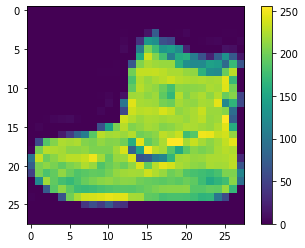

In [0]:
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images /255.0

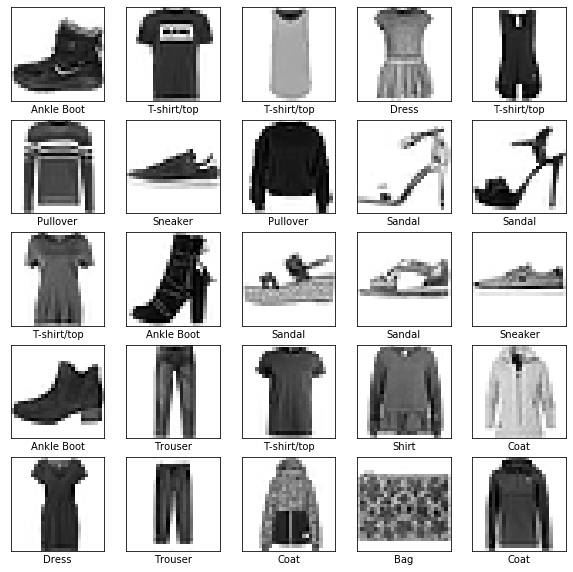

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()  

In [0]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(128,activation=tf.nn.relu),
                          keras.layers.Dense(10,activation=tf.nn.softmax)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [0]:
model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.4981 - acc: 0.8254
Epoch 2/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3755 - acc: 0.8637
Epoch 3/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3379 - acc: 0.8773
Epoch 4/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3123 - acc: 0.8845
Epoch 5/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2961 - acc: 0.8892
Epoch 6/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2791 - acc: 0.8960
Epoch 7/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2689 - acc: 0.9000
Epoch 8/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2559 - acc: 0.9044
Epoch 9/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2467 - acc: 0.9082
Epoch 10/10
60000/60000 [==============================] - 

In [25]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print('Test accuracy',test_acc)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.3414 - acc: 0.8823
Test accuracy 0.8823


In [0]:
predictions = model.predict(test_images)

In [27]:
predictions[0]

array([1.5479034e-07, 1.5640047e-09, 1.8113736e-08, 1.5146346e-08,
       2.1229395e-08, 1.6642005e-04, 4.0433366e-07, 1.5943853e-02,
       9.4963025e-07, 9.8388821e-01], dtype=float32)

In [28]:
np.argmax(predictions[0])

9

In [29]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array,true_label,img):
  predictions_array,true_label,img = predictions_array[i],true_label[i],img[i]
  plt.grid(False)
  plt.xticks()
  plt.yticks()

  plt.imshow(img,cmap=plt.cm.binary)
  predicted_label =np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color='red'

  plt.xlabel("{}{:2.0f}% ({})".format(class_names[predicted_label],
                                      100*np.max(predictions_array),
                                      class_names[true_label]),
             color=color)

def plot_value_array(i,predictions_array,true_label):
  predictions_array,true_label =predictions_array[i],true_label[i]
  plt.grid(False)
  plt.xticks()
  plt.yticks()
  thisplot = plt.bar(range(10),predictions_array,color ="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')





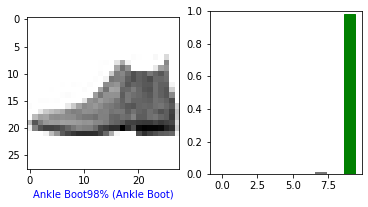

In [37]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

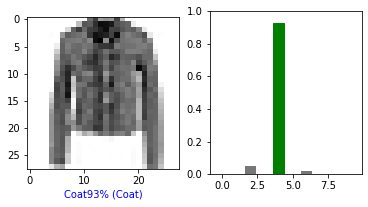

In [38]:
i=10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

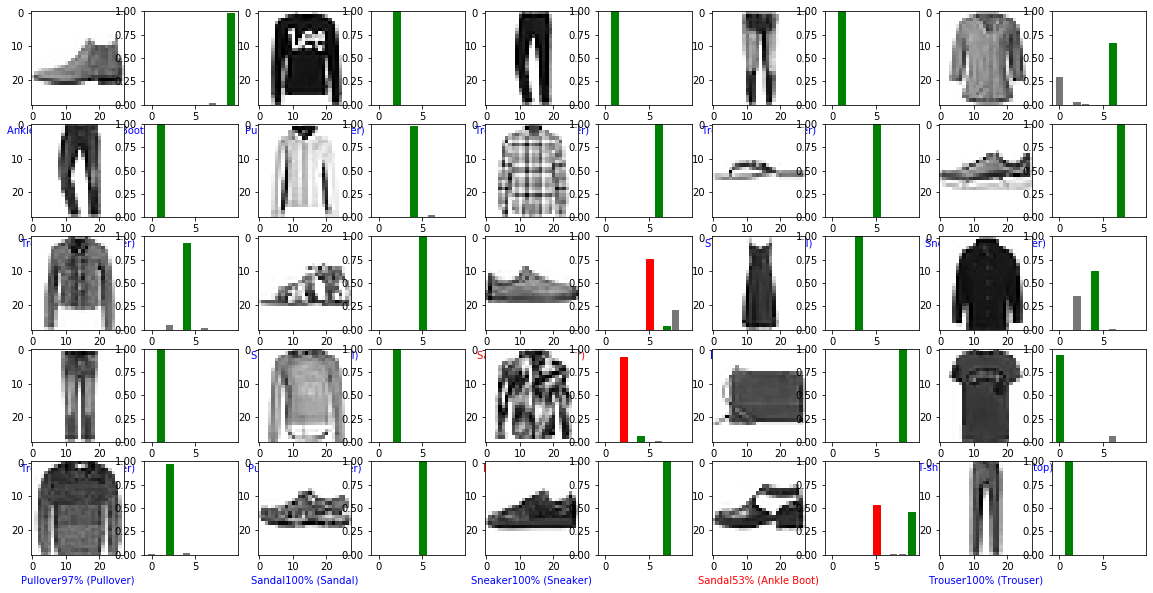

In [43]:
num_rows = 5
num_cols = 5
num_images =num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i,predictions,test_labels,test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i,predictions,test_labels)
plt.show()  